In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Pertubation voltage

Setup

In [76]:
N = 2 ** 11
Dt = 1e-3
L = 10 # in nm
D0 = 1e-10 * 1e9 ** 2
M = 1000
T0 = M * L ** 2 / D0



# create time axis
time = np.zeros(N, dtype = np.float64)
for j in range(0,N):
    time[j] = j*Dt

# Sampling and Nyquist Frequency
f_Ny = np.floor(1.0 / (2.2 * Dt)) # Maximal frerquency with secturity 2.2, floor that
f_s = 1.0 / (N * Dt)

print("Nyquist Frequency", f_Ny / T0)
print("Sample Frequency", f_s / T0)
print("Number of Points", N)



Nyquist Frequency 454000.0
Sample Frequency 488.28125
Number of Points 2048


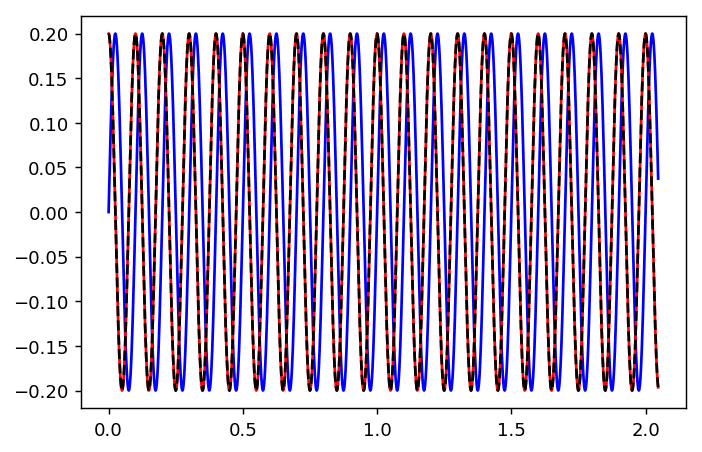

[0.2        1.57079633]
[[2.69497083e-34 2.45867854e-37]
 [2.45867854e-37 6.72453985e-33]]


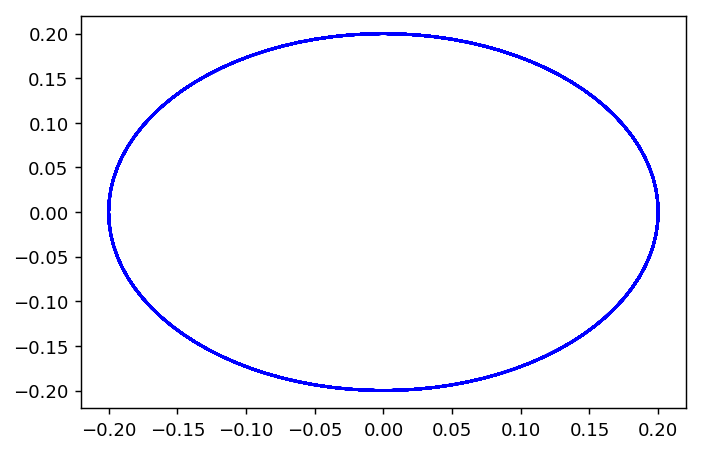

In [82]:
# frequency in Hz
freq = 10000
Cap = 1e-1
phase = np.pi / 2.0

voltage = np.zeros(N, dtype = np.float64)

U0 = 0.2

voltage = U0 * np.sin( 2 * np.pi * freq * T0 * time)

current = U0 * np.sin( 2 * np.pi * freq * T0 * time + phase ) #+ np.random.randn(N) * 1e-3

# fitting
def fit_fun( time, a, shift  ):
    global freq, T0
    
    return ( a *  np.sin( 2 * np.pi * freq * T0 * time + shift) )

def fit_fun2( time, ampl, shift):
    global freq, T0
    
    return ( ampl * np.exp( 1j * ( 2 * np.pi * freq * time + shift  ) ) )

p_initial = [ U0+1, np.pi]

popt, pcov = curve_fit( fit_fun, time, current, p0 = None  )
# plotting

fig = plt.figure(dpi = 130)

ax = fig.add_subplot(1,1,1)

ax.plot(time, voltage, color = "blue")
ax.plot(time, current, color = "red")

# plot fitted curve
ax.plot(time, fit_fun( time, popt[0], popt[1] ), ls = "--", color =  "black")

plt.show()

print(popt)

print(pcov)

fig = plt.figure(dpi = 130)

ax = fig.add_subplot(1,1,1)

ax.plot(voltage, current, color = "blue")
#ax.plot(time, , color = "red")

# plot fitted curve
#ax.plot(time, fit_fun( time, popt[0], popt[1] ), ls = "--", color =  "black")

plt.show()



outer loop

voltage pertubation

    inner loop
    
        current <-- simulation
    
    fit results
    
    calc impedance for this point
    